# **POSTTEST 2**
**Analisis Dataset**

Pada bagian ini dilakukan analisis awal untuk memahami karakteristik dataset.  
Langkah-langkah analisis meliputi:

**1. Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

%matplotlib inline


**2. Load Dataset**

In [4]:
df = pd.read_csv('top2020.csv')


**3. Statistik Deskriptif (numerik)**

In [5]:
# Menampilkan rata-rata, std, min, max, Q1, Q2, Q3
df.describe()


,Ranking,Rangking.Provinsi,Nilai.Total
count,1000.000000,1000.000000,1000.000000
mean,500.500000,61.988000,533.885154
std,288.819436,52.251508,19.161997
min,1.000000,1.000000,510.509000
25%,250.750000,14.000000,518.690250
50%,500.500000,49.000000,528.793500
75%,750.250000,103.000000,544.879750
max,1000.000000,187.000000,601.683000


**4. Tampilkan 10 Record Pertama**

In [6]:
df.select_dtypes(include='number').head(10)

,Ranking,Rangking.Provinsi,Nilai.Total
0,1,1,601.683
1,2,1,599.654
2,3,1,598.523
3,4,2,594.865
4,5,1,594.605
5,6,3,594.437
6,7,1,592.520
7,8,4,589.811
8,9,1,588.002
9,10,2,587.810


**5. Informasi Dataset**

In [7]:
print("Jumlah record:", len(df))
print("Jumlah attribute:", len(df.columns))
print("Nama attribute:", list(df.columns))
print("Jumlah attribute numerik:", len(df.select_dtypes(include='number').columns))

Jumlah record: 1000
Jumlah attribute: 8
Nama attribute: ['Ranking', 'Rangking.Provinsi', 'Nilai.Total', 'NPSN', 'Sekolah', 'Provinsi', 'Kab.Kota', 'Jenis']
Jumlah attribute numerik: 3


**6. Jumlah Label Unik Untuk Attribute Object**

In [8]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Attribute '{col}':")
    print(df[col].value_counts())
    print("-"*30)

Attribute 'NPSN':
NPSN
20606846    1
20109933    1
20623314    1
10263538    1
20102568    1
           ..
20107319    1
20403178    1
30315142    1
20532145    1
20403174    1
Name: count, Length: 1000, dtype: int64
------------------------------
Attribute 'Sekolah':
Sekolah
SMAS MARDI YUANA                              2
SMAS BUDI MULIA                               2
SMAS REGINA PACIS                             2
SMAS SANTA MARIA                              2
SMAS BUNDA HATI KUDUS                         2
                                             ..
SMAN 8                                        1
SMAN 3 MAGELANG                               1
SMAS NASIONAL PLUS CINTABUDAYA / CHONG WEN    1
SMAN 1 METRO                                  1
SMAN 11 SURABAYA                              1
Name: count, Length: 992, dtype: int64
------------------------------
Attribute 'Provinsi':
Provinsi
JAWA TENGAH                  187
JAWA BARAT                   182
JAWA TIMUR                  

**7. Visualisasi Dataset**

Histogram (distribusi numerik)

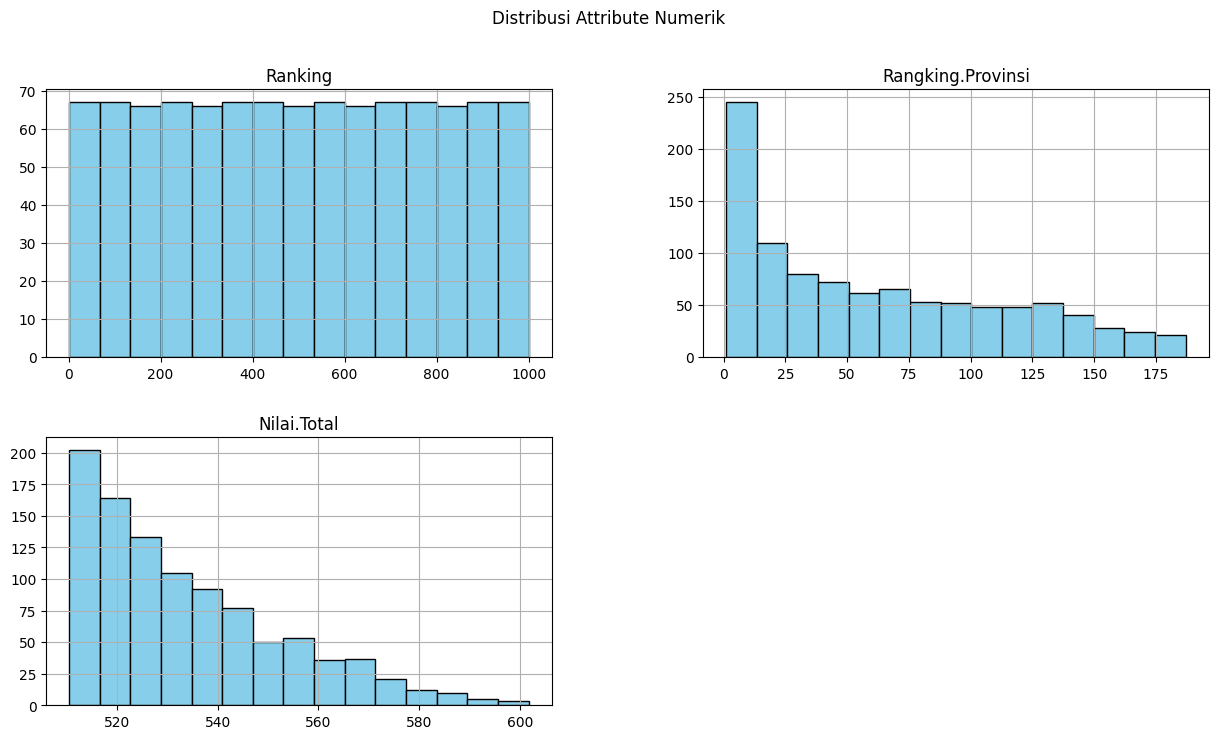

In [9]:
num_cols = df.select_dtypes(include='number').columns

df[num_cols].hist(bins=15, figsize=(15,8), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Attribute Numerik')
plt.show()

Boxplot (untuk outlier)

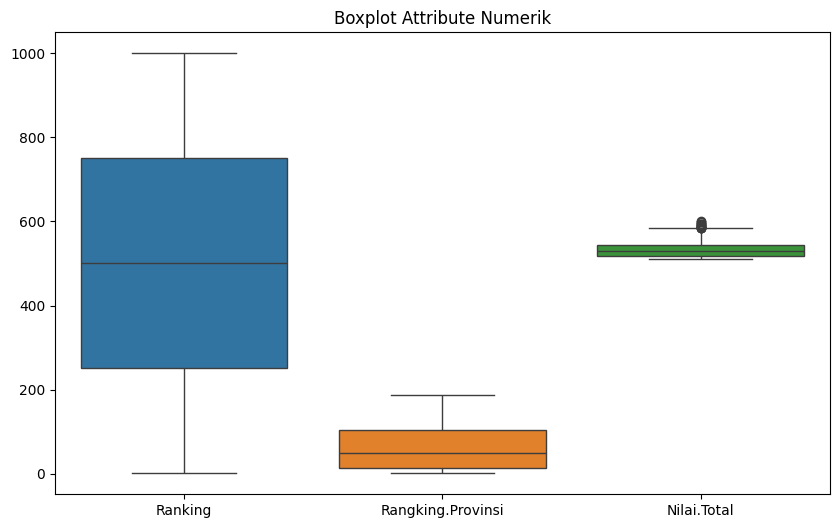

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot Attribute Numerik')
plt.show()

**8. Korelasi Dataset (heatmap)**

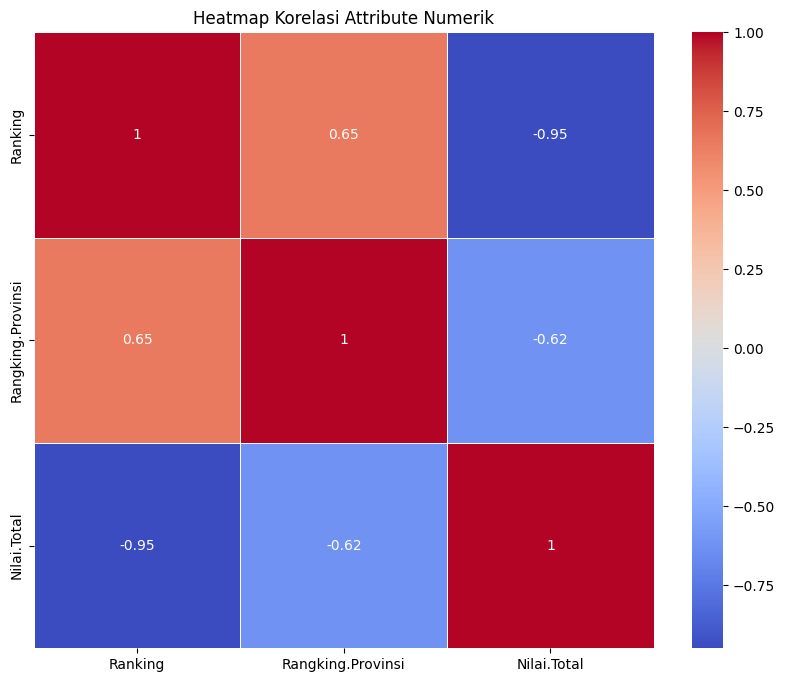

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Attribute Numerik')
plt.show()

**Kesimpulan analisis**

1. Statistik deskriptif menunjukkan distribusi, rata-rata, standar deviasi, serta nilai min/max/Q1/Q2/Q3 untuk semua attribute numerik.
2. 10 record pertama memberikan gambaran awal data numerik.
3. Informasi dataset mempermudah mengetahui jumlah record, attribute, dan tipe data.
4. Jumlah label unik di attribute kategorikal memberikan insight variabilitas data non-numerik.
5. Histogram & boxplot membantu memahami distribusi dan mendeteksi outlier.
6. Heatmap korelasi memperlihatkan hubungan antar attribute numerik, berguna untuk analisis lebih lanjut.

#**POSTTEST 3**
**Data Preprocessing Dataset**

Pada bagian ini dilakukan preprocessing data agar dataset lebih bersih, terstandarisasi, dan siap dipakai untuk pemodelan machine learning.  
Langkah-langkah yang dilakukan:

**9. Data Cleaning**
   - Menangani missing value.  
   - Menghapus duplicate.  
   - Mengatasi outlier.  


In [12]:
print("\n--- Missing Value ---")
print("Jumlah missing value sebelum cleaning:")
print(df.isnull().sum())

df = df.dropna()  # drop baris yang ada missing

print("Jumlah missing value setelah cleaning:")
print(df.isnull().sum())

print("\n--- Duplicate Value ---")
print("Jumlah duplikat sebelum cleaning:", df.duplicated().sum())
df = df.drop_duplicates()
print("Jumlah duplikat setelah cleaning:", df.duplicated().sum())

print("\n--- Outlier Handling (IQR Method) ---")
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Jumlah record setelah outlier removal:", len(df))


--- Missing Value ---
Jumlah missing value sebelum cleaning:
Ranking              0
Rangking.Provinsi    0
Nilai.Total          0
NPSN                 0
Sekolah              0
Provinsi             0
Kab.Kota             0
Jenis                0
dtype: int64
Jumlah missing value setelah cleaning:
Ranking              0
Rangking.Provinsi    0
Nilai.Total          0
NPSN                 0
Sekolah              0
Provinsi             0
Kab.Kota             0
Jenis                0
dtype: int64

--- Duplicate Value ---
Jumlah duplikat sebelum cleaning: 0
Jumlah duplikat setelah cleaning: 0

--- Outlier Handling (IQR Method) ---
Jumlah record setelah outlier removal: 984


**10. Normalisasi / Standarisasi Kolom Numerik**
   - Agar skala antar fitur numerik seragam.

In [13]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("\nKolom numerik setelah standarisasi:")
display(df[num_cols].head())


Kolom numerik setelah standarisasi:


,Ranking,Rangking.Provinsi,Nilai.Total
16,-1.730291,-1.170160,2.860456
17,-1.726771,-1.150962,2.841742
18,-1.723251,-1.170160,2.779661
19,-1.719730,-1.054976,2.751758
20,-1.716210,-1.035778,2.724807


**11. Encoding Kolom Kategorikal**
   - Mengubah data kategorikal menjadi numerik agar bisa digunakan oleh algoritma ML.

In [14]:
categorical_cols = df.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)
df = pd.concat([df.drop(columns=categorical_cols), encoded], axis=1)
print("\nDataset setelah encoding:")
display(df.head())


Dataset setelah encoding:


,Ranking,Rangking.Provinsi,Nilai.Total,NPSN_10102744,NPSN_10107194,NPSN_10107309,NPSN_10111885,NPSN_10201985,NPSN_10206580,NPSN_10208520,...,Kab.Kota_KOTA TANGERANG SELATAN,Kab.Kota_KOTA TANJUNGPINANG,Kab.Kota_KOTA TARAKAN,Kab.Kota_KOTA TASIKMALAYA,Kab.Kota_KOTA TEGAL,Kab.Kota_KOTA TOMOHON,Kab.Kota_KOTA YOGYAKARTA,Jenis_PKBM,Jenis_SMA,Jenis_SMK
16,-1.730291,-1.170160,2.860456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,-1.726771,-1.150962,2.841742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18,-1.723251,-1.170160,2.779661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,-1.719730,-1.054976,2.751758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,-1.716210,-1.035778,2.724807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**12. Feature Engineering**
   - Menambahkan minimal satu fitur baru untuk memperkaya informasi.

In [15]:
if len(num_cols) >= 2:
    df['feature_ratio'] = df[num_cols[0]] / (df[num_cols[1]] + 1e-9)
    print(f"\nFitur baru 'feature_ratio' ditambahkan dari {num_cols[0]} / {num_cols[1]}")
display(df.head())


Fitur baru 'feature_ratio' ditambahkan dari Ranking / Rangking.Provinsi


,Ranking,Rangking.Provinsi,Nilai.Total,NPSN_10102744,NPSN_10107194,NPSN_10107309,NPSN_10111885,NPSN_10201985,NPSN_10206580,NPSN_10208520,...,Kab.Kota_KOTA TANJUNGPINANG,Kab.Kota_KOTA TARAKAN,Kab.Kota_KOTA TASIKMALAYA,Kab.Kota_KOTA TEGAL,Kab.Kota_KOTA TOMOHON,Kab.Kota_KOTA YOGYAKARTA,Jenis_PKBM,Jenis_SMA,Jenis_SMK,feature_ratio
16,-1.730291,-1.170160,2.860456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.478680
17,-1.726771,-1.150962,2.841742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.500285
18,-1.723251,-1.170160,2.779661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.472663
19,-1.719730,-1.054976,2.751758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.630114
20,-1.716210,-1.035778,2.724807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.656928


**13. Splitting Data**
   - Memisahkan data training & testing untuk evaluasi model.

In [16]:
X = df.drop(columns=df.columns[-1])
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n=== Splitting Data ===")
print("Jumlah data training:", X_train.shape)
print("Jumlah data testing:", X_test.shape)


=== Splitting Data ===
Jumlah data training: (787, 2201)
Jumlah data testing: (197, 2201)
